In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [12]:
# Function plotter

def plot_func(f,min=-2.1,max=2.1,colour='r'):
    x = np.linspace(min,max,100)[:,None]
    plt.plot(x,f(x),colour)

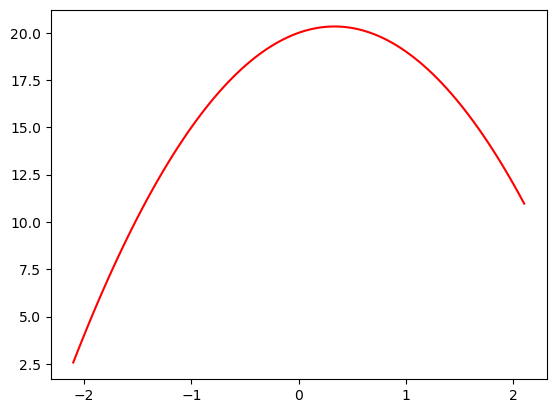

In [16]:
# Plot quadratic
def f(x): return -3*x**2 + 2*x + 20

plot_func(f)

In [19]:
# Create functions that add noise to data
np.random.seed(42)

def noise(x,scale): return np.random.normal(scale=scale,size=x.shape)
def add_noise(x,mult,add): return x*(1+noise(x,mult))+noise(x,add)

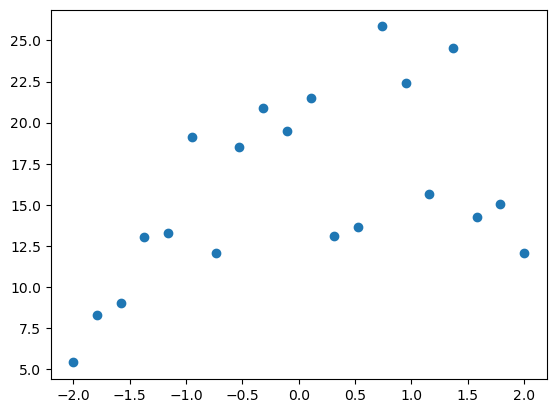

In [39]:
# Create sample data
x = np.linspace(-2,2,num=20)[:,None]
y = add_noise(f(x),0.2,1.3)
plt.scatter(x,y);

In [42]:
# Define a regression engine to fit data based on an x-level polynomial
def plot_poly(degree):
    model = make_pipeline(PolynomialFeatures(degree),LinearRegression())
    model.fit(x,y)
    plt.scatter(x,y)
    plot_func(model.predict)

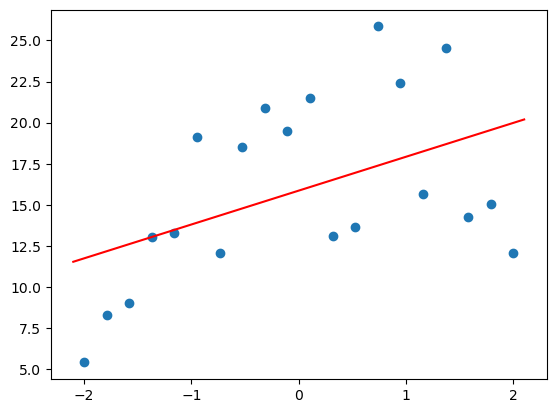

In [43]:
plot_poly(1)

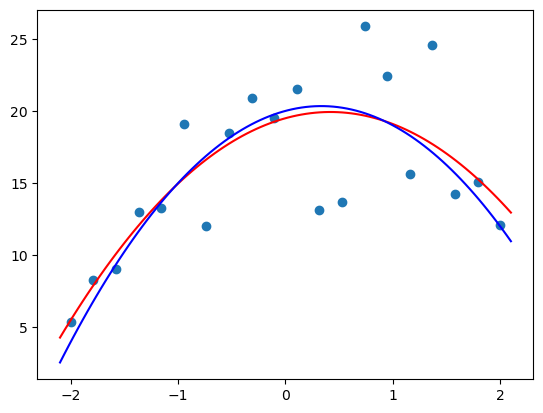

In [57]:
plot_poly(2)
plot_func(f,colour='b')

In [67]:
from ipywidgets import interact, IntSlider

In [69]:
@interact(degree=IntSlider(min=0,max=15,step=1,value=1))
def plot_poly(degree):
    model = make_pipeline(PolynomialFeatures(degree),LinearRegression())
    model.fit(x,y)
    plt.scatter(x,y)
    plot_func(model.predict)


interactive(children=(IntSlider(value=1, description='degree', max=15), Output()), _dom_classes=('widget-inter…